# Finding Nemo

**Build an image classifier**

1.  cut the image into slices of 224x224 pixels
2.  predict labels using ResNet50
3.  collect all labels in all slices
4.  filter labels above a probability threshold
5.  write the labels to a text file

In [1]:
from matplotlib import pyplot as plt
import numpy as np

#### Let's use Keras' image class to load and manipulate images!

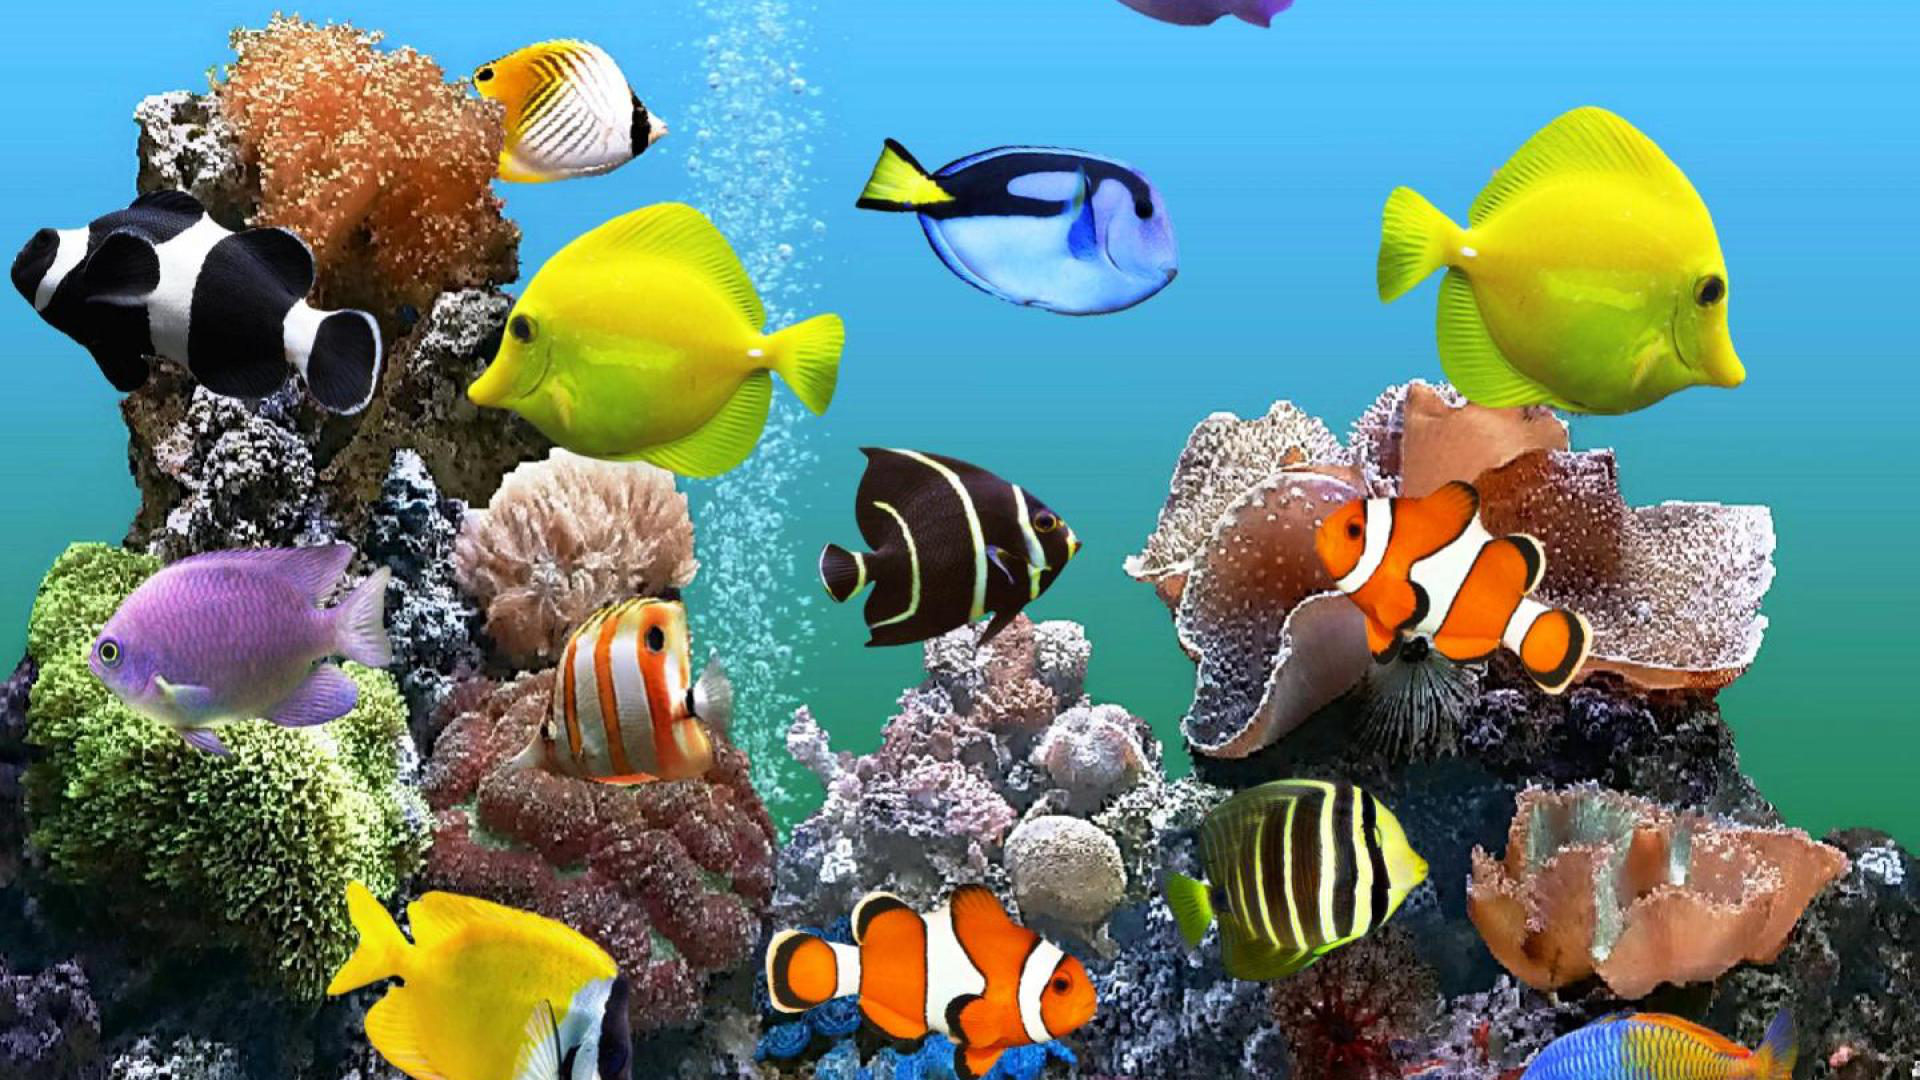

In [2]:
from tensorflow.keras.preprocessing import image
img = image.load_img('aquarium.jpg')
img

In [3]:
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1920, 1080)


### Convert the image to an array, and check out some of the properties.

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [5]:
img_array = img_to_array(img)

In [6]:
print(img_array.dtype)
print(img_array.shape)

float32
(1080, 1920, 3)


### Trim the image, if necessary.

In [7]:
img_a = img_array[:224, :224, :]
img_a = img_a.reshape(1, 224, 224, 3)
img_a.shape, img_a.dtype

((1, 224, 224, 3), dtype('float32'))

### Create a prediction for one 224x224 slice

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [9]:
from matplotlib.pyplot import imread

m = ResNet50()
m.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#a = imread('myimage.png')
p = m.predict(img_a)

In [11]:
from pprint import pprint

pprint(decode_predictions(p, 10))

[[('n03476684', 'hair_slide', 0.42580473),
  ('n02791124', 'barber_chair', 0.052552294),
  ('n04133789', 'sandal', 0.04219479),
  ('n03944341', 'pinwheel', 0.033359047),
  ('n04286575', 'spotlight', 0.026562642),
  ('n03047690', 'clog', 0.02527838),
  ('n02883205', 'bow_tie', 0.022058407),
  ('n04325704', 'stole', 0.019415528),
  ('n04591157', 'Windsor_tie', 0.01743592),
  ('n03720891', 'maraca', 0.01726637)]]


#### Try another slice to find a fish...

In [12]:
img_b = img_array[224:448, 224:448, :]
img_b = img_b.reshape(1, 224, 224, 3)
img_b.shape, img_b.dtype

((1, 224, 224, 3), dtype('float32'))

In [13]:
p = m.predict(img_b)
pprint(decode_predictions(p, 10))

[[('n03447721', 'gong', 0.22293687),
  ('n02504013', 'Indian_elephant', 0.058509782),
  ('n03950228', 'pitcher', 0.05424459),
  ('n02071294', 'killer_whale', 0.049991928),
  ('n03388043', 'fountain', 0.032625593),
  ('n04258138', 'solar_dish', 0.03235823),
  ('n02100236', 'German_short-haired_pointer', 0.017086871),
  ('n02415577', 'bighorn', 0.016614221),
  ('n02892767', 'brassiere', 0.01625543),
  ('n04579432', 'whistle', 0.014870247)]]


In [14]:
img_array.shape

(1080, 1920, 3)

In [15]:
img_c = img_array[448:672, 224:448, :]
img_c = img_c.reshape(1, 224, 224, 3)
img_c.shape, img_c.dtype

((1, 224, 224, 3), dtype('float32'))

In [16]:
p = m.predict(img_c)
pprint(decode_predictions(p, 10))

[[('n01443537', 'goldfish', 0.7007695),
  ('n01440764', 'tench', 0.15396608),
  ('n02514041', 'barracouta', 0.05325428),
  ('n02641379', 'gar', 0.020151589),
  ('n01632777', 'axolotl', 0.011208051),
  ('n01496331', 'electric_ray', 0.010323726),
  ('n02655020', 'puffer', 0.0071028057),
  ('n02606052', 'rock_beauty', 0.007032653),
  ('n01491361', 'tiger_shark', 0.0066938135),
  ('n02640242', 'sturgeon', 0.0045632413)]]


### Collect 224x224 slices by looping over the image.

In [17]:
#slices = img_array[(i*s):(i*s)+s, (i*s):(i*s)+s, :]
#slices = slices.reshape(1, 224, 224, 3)
#slice_list.append(slices)

s = 224
slice_list=[]

for x in range (0, 1920-s, s):
    for y in range(0, 1080-s, s):
        print(str(x) + ': x')
        print(str(y) + ': y')
        slices = img_array[x:x+s, y:y+s, :]
        slices = slices.reshape(1, 224, 224, 3)
        slice_list.append(slices)

0: x
0: y
0: x
224: y
0: x
448: y
0: x
672: y
224: x
0: y
224: x
224: y
224: x
448: y
224: x
672: y
448: x
0: y
448: x
224: y
448: x
448: y
448: x
672: y
672: x
0: y
672: x
224: y
672: x
448: y
672: x
672: y
896: x
0: y


ValueError: cannot reshape array of size 123648 into shape (1,224,224,3)

In [18]:
slice_list

[array([[[[ 86., 197., 253.],
          [ 86., 197., 253.],
          [ 86., 197., 253.],
          ...,
          [ 90., 195., 253.],
          [ 90., 195., 253.],
          [ 90., 195., 253.]],
 
         [[ 86., 197., 253.],
          [ 86., 197., 253.],
          [ 86., 197., 253.],
          ...,
          [ 90., 195., 253.],
          [ 90., 195., 253.],
          [ 90., 195., 253.]],
 
         [[ 86., 197., 253.],
          [ 86., 197., 253.],
          [ 86., 197., 253.],
          ...,
          [ 92., 197., 255.],
          [ 92., 197., 255.],
          [ 92., 197., 255.]],
 
         ...,
 
         [[ 77., 180., 238.],
          [ 77., 180., 238.],
          [ 77., 180., 238.],
          ...,
          [ 28.,  27.,  22.],
          [ 30.,  29.,  24.],
          [ 33.,  32.,  27.]],
 
         [[ 75., 178., 236.],
          [ 75., 178., 236.],
          [ 75., 178., 236.],
          ...,
          [ 31.,  30.,  25.],
          [ 35.,  34.,  29.],
          [ 36.,  35.,  31.

In [ ]:
s = 244
i = 0
slices = img_array[(i*s):(i*s)+s, (i*s):(i*s)+s, :]
slices.shape

In [ ]:
slices = slices.reshape(1, 224, 224, 3)

In [ ]:
'''window_size = 5

for idx in range(len(arr) - window_size + 1):
    first = idx
    last = idx + window_size
    slice_arr = arr[first:last]
    #do something with slice_arr'''

### Use ResNet50 to make predictions on the image slices.

### Collect labels with the highest probabilty.

### Discuss the results this manual image recognition system.
- What are some of the reasons why we still get weird results?
- What could we do to improve the model?
- How does this general approach (from scratch) differ from how other DNN image recognition systems operate?
